<a href="https://colab.research.google.com/github/atopatalos/Repository_Project_dibimbing/blob/main/PR_day16_EnsembleLearning_Regression_Patalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Patalo Selobakin

**0. Problem /Dataset Definition:**

1.   Datasets is called 'insurance.csv'
2.   Regression problem with the goal to predict the insurance cost based on each individual featrure.

Data Set feature information :

1.   age : age of the individual
2.   sex : gender of the individual
3.   bmi : body mass index
4.   children : amount of children the individual has
5.   smoker : indicates if the individual smoke or not
6.   charges : Individual medical costs billed by health insurance



**1. Preparation:**

1.   Installation of Xgboost
2.   Package/Library setup
3.   Dataset ETL (Extract, Load)

In [ ]:
#install xgboost
!pip install xgboost

#install optuna
#Optuna: A hyperparameter optimization framework
#Advantage contribution parameter
!pip install optuna

In [ ]:
# Library Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import optuna

In [ ]:
def load_data():
  data = pd.read_csv('/content/drive/MyDrive/dibimbing_ML/day16_ensemble_regression/insurance.csv')
  data =  data.dropna()
  return data




In [ ]:
# Check the data
df = load_data()
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<ipython-input-5-70dd928aec6f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], color="b");


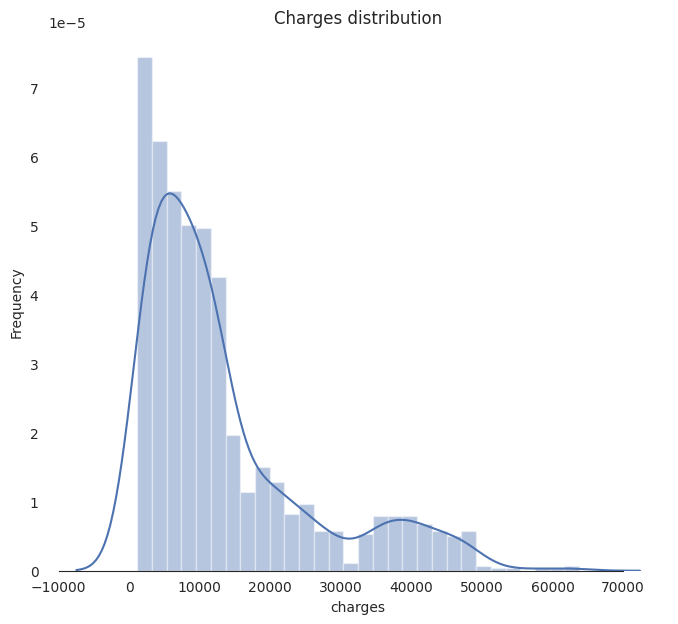

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution
sns.distplot(df['charges'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="charges")
ax.set(title="Charges distribution")
sns.despine(trim=True, left=True)
plt.show()

<ipython-input-6-151305fde5ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

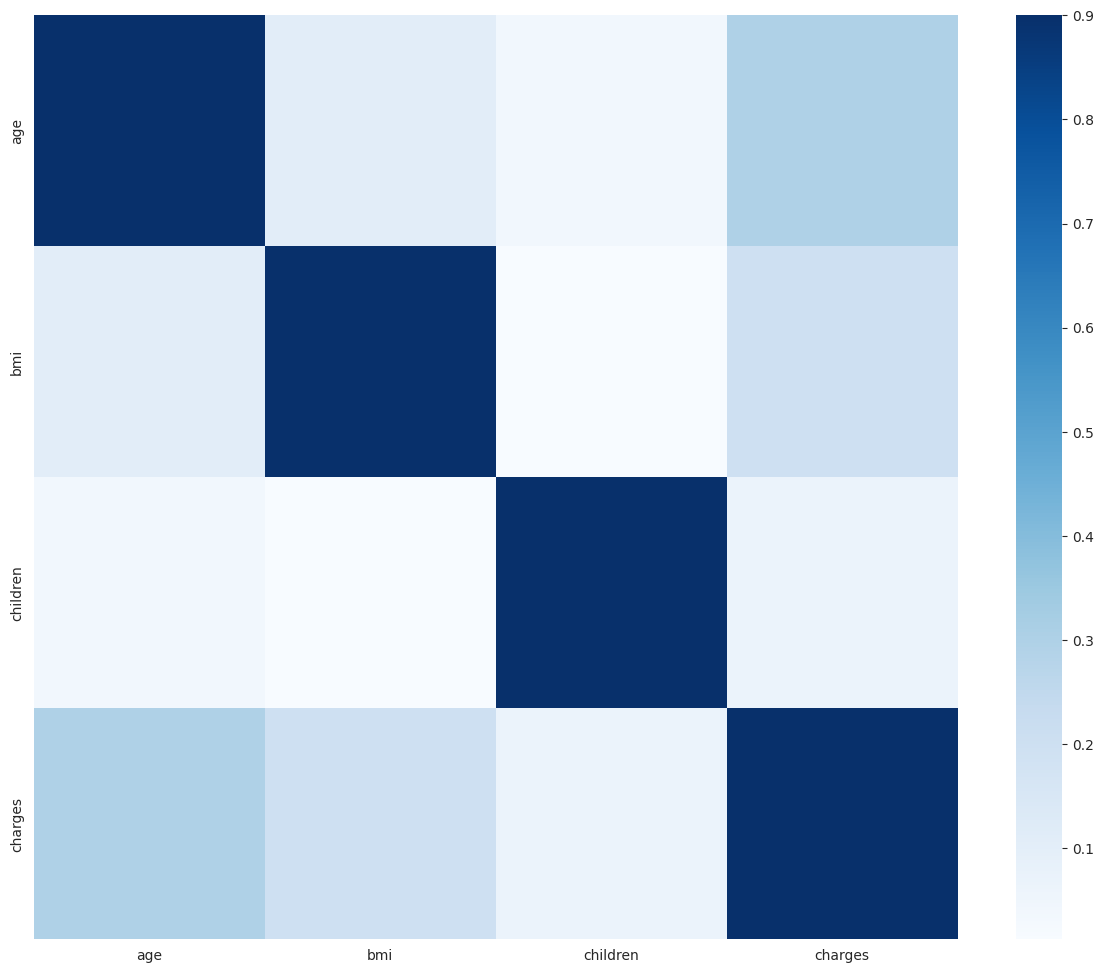

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

3. **Feature Engineering & Pre Model data re-check:**

Label Encode three categorical features sex, region, smoker.


In [ ]:
# Perform label encoding on feature 'sex'
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['sex'])

df = df.drop('sex', axis=1)

In [ ]:
# Perform label encoding on feature 'smoker'
df['smoker_encoded'] = le.fit_transform(df['smoker'])

# Now 'sex' is encoded in the 'sex_encoded' column, and you can drop the original 'sex' column if needed
df = df.drop('smoker', axis=1)

In [ ]:
# Perform label encoding on feature 'region'
df['region_encoded'] = le.fit_transform(df['region'])

# Now 'sex' is encoded in the 'sex_encoded' column, and you can drop the original 'sex' column if needed
df = df.drop('region', axis=1)

In [ ]:
# Check the exact naming of the columns
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded',
       'region_encoded'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_standardize = ['age', 'bmi']

# Fit the scaler on the selected features and transform the data
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

In [ ]:
df.describe()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
count,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,-1.805565e-16,-2.124194e-16,1.094918,13270.422265,0.505232,0.204783,1.515695
std,1.000374e+00,1.000374e+00,1.205493,12110.011237,0.500160,0.403694,1.104885
min,-1.509965e+00,-2.412011e+00,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,-8.691547e-01,-7.164063e-01,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,-1.474046e-02,-4.320880e-02,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,8.396738e-01,6.611572e-01,2.000000,16639.912515,1.000000,0.000000,2.000000
max,1.765289e+00,3.685522e+00,5.000000,63770.428010,1.000000,1.000000,3.000000


In [ ]:
# Check again the dataset
df.head(10)

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,-1.438764,-0.453320,0,16884.92400,0,1,3
1,-1.509965,0.509621,1,1725.55230,1,0,2
2,-0.797954,0.383307,3,4449.46200,1,0,2
3,-0.441948,-1.305531,0,21984.47061,1,0,1
4,-0.513149,-0.292556,0,3866.85520,1,0,1
5,-0.584350,-0.807656,0,3756.62160,0,0,2
6,0.483668,0.455486,1,8240.58960,0,0,2
7,-0.157143,-0.479567,3,7281.50560,0,0,1
8,-0.157143,-0.136714,2,6406.41070,1,0,0
9,1.480485,-0.791252,0,28923.13692,0,0,1


4. **Train Test Split:**

In [ ]:
# Split the dataset into X contains all feature except the target
# dataframe y contains the target feature price
X = df.drop('charges',axis=1)
y = df['charges']

In [ ]:
# Establish the model
xgb = XGBRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
linear = LinearRegression() #baseline model

5. **Model:**

In [ ]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor


In [ ]:
# Established the model
ml = [('Linear Regression',linear),
      ('Decission Trees',dt),
         ('Random Forest',rf),
         ('Xgboost',xgb)]

# store all the performance evaluation metrics
r2_train = []
r2_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []
models = []

# 1st Iteration to each model chosen
# 2nd Iteration to perform different variation of split
for model in ml:
  for x in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    model[1].fit(X_train,y_train)

    predict_train = model[1].predict(X_train)
    predict_test = model[1].predict(X_test)

    r2_score_train = r2_score(y_train,predict_train)
    r2_score_test = r2_score(y_test,predict_test)

    mae_score_train = mean_absolute_error(y_train,predict_train)
    mae_score_test = mean_absolute_error(y_test,predict_test)

    mse_score_train = mean_squared_error(y_train,predict_train)
    mse_score_test = mean_squared_error(y_test,predict_test)

    rmse_score_train = np.sqrt(mse_score_train)
    rmse_score_test = np.sqrt(mse_score_test)

    r2_train.append(r2_score_train)
    r2_test.append(r2_score_test)
    mae_train.append(mae_score_train)
    mae_test.append(mae_score_test)
    mse_train.append(mse_score_train)
    mse_test.append(mse_score_test)
    rmse_train.append(rmse_score_train)
    rmse_test.append(rmse_score_test)
    models.append(model[0])


df_metrics = pd.DataFrame({'model':models,
                           'r2_score_train':r2_train,
                           'r2_score_test':r2_test,
                           'MAE_train':mae_train,
                           'MAE_test':mae_test,
                           'MSE_train':mse_train,
                           'MSE_test':mse_test,
                           'RMSE_train':rmse_train,
                           'RMSE_test':rmse_test})

In [ ]:
print(model[1])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [ ]:
df_metrics

,model,r2_score_train,r2_score_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,Linear Regression,0.750442,0.749345,4250.257372,4054.094861,3.726809e+07,3.508671e+07,6104.759826,5923.403420
1,Linear Regression,0.765839,0.713747,4099.772920,4347.912141,3.428773e+07,4.198634e+07,5855.572553,6479.686347
2,Linear Regression,0.767492,0.700592,3925.009978,4335.892144,3.446481e+07,4.266372e+07,5870.673736,6531.747336
3,Linear Regression,0.744909,0.763524,4228.027060,4125.758197,3.788005e+07,3.353803e+07,6154.677253,5791.203038
4,Linear Regression,0.760082,0.723019,4206.546248,4309.501797,3.632826e+07,3.731748e+07,6027.292918,6108.803232
5,Linear Regression,0.747422,0.754430,4184.479261,4152.478485,3.597885e+07,3.830418e+07,5998.237511,6189.037002
6,Linear Regression,0.745098,0.760437,4114.467731,4207.657416,3.646345e+07,3.696104e+07,6038.496979,6079.559539
7,Linear Regression,0.740328,0.772939,4247.648550,4013.657318,3.772290e+07,3.391661e+07,6141.897319,5823.796686
8,Linear Regression,0.739065,0.772998,4232.398455,4164.604574,3.712154e+07,3.551133e+07,6092.744766,5959.138149
9,Linear Regression,0.750074,0.751444,4211.296113,4083.619500,3.727984e+07,3.490222e+07,6105.721788,5907.809994


6. **1st Round Evaluation:**

In [ ]:
#visualize
train_metrics = [x for x in df_metrics.columns if '_train_1' in x]
test_metrics = [x for x in df_metrics.columns if '_test_1' in x]

In [ ]:
for train in train_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=train)
  plt.title(f"Evaluation {train}")
  plt.show()

In [ ]:
for test in test_metrics:
  plt.figure()
  sns.boxplot(data=df_metrics,x='model',y=test)
  plt.title(f"Evaluation {test}")
  plt.show()

**7. Tuning Parameter XGBoost**
Hyperparameter to be tuned:
1.   Learning rate
2.   max_depth (depth of tree)
3.   n_estimators
4.   subsample
5.   reg_lambda



In [ ]:
# Split of initial data X and y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**7.1. Hyperparameter**

**7.a. Learning Rate**




In [ ]:
# Setup Initial learning rate values
# Initial Root Mean Square Error empty value
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []

# Iterate Fitting of data into Model with iteration parameter of learning rate
for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


# Store in a dataset containing learning rate values, and its corresponding RMSE score
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

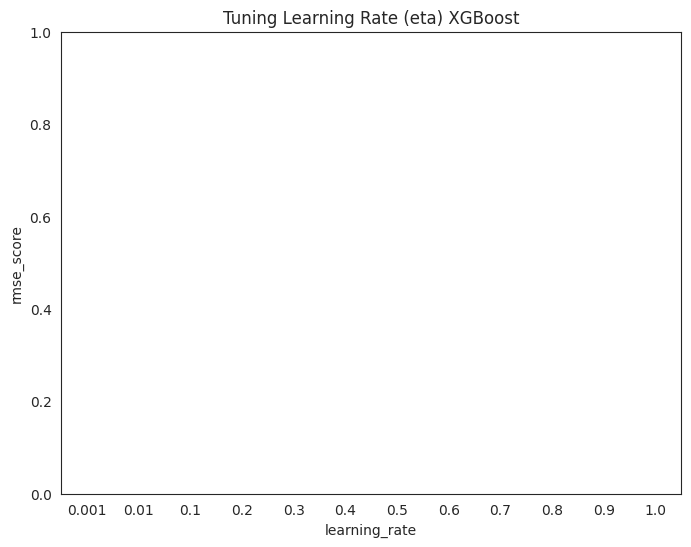

In [ ]:
# Visualize the the learning rate and its RMSE Score
plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate (eta) XGBoost')
plt.ylim(0,1)
plt.show()

**7.b. Learning Rate**

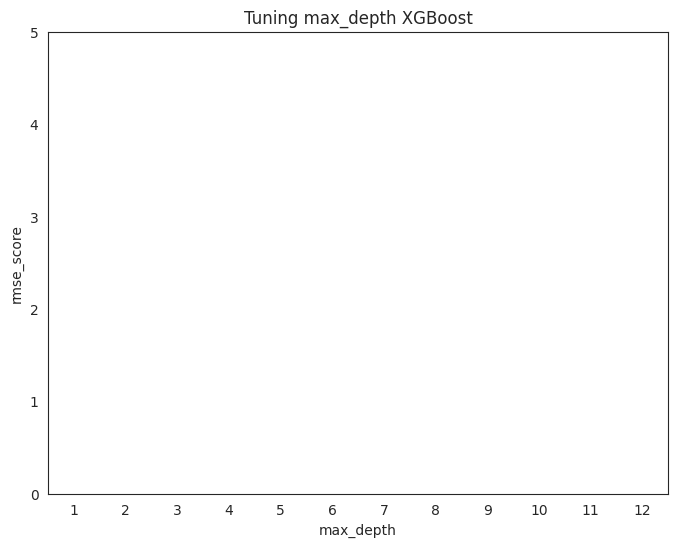

In [ ]:
max_depth = []
rmse_score = []

for depth in range(1,13):
  xgb = XGBRegressor(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth XGBoost')
plt.ylim(0,5)
plt.show()

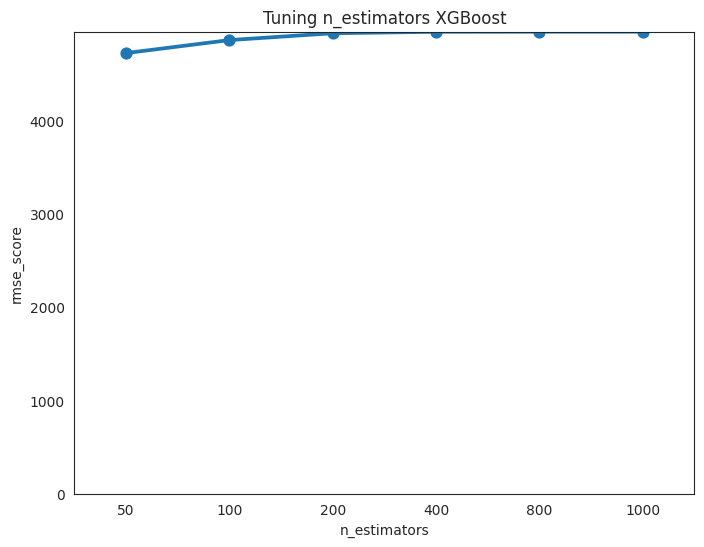

In [ ]:
n_estimators = []
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000]:
  xgb = XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators XGBoost')
plt.ylim(0,max(df_estimator['rmse_score'])+0.99)
plt.show()

**7.c. Estimators**

In [ ]:
max_depth = 6
n_estimators = 100

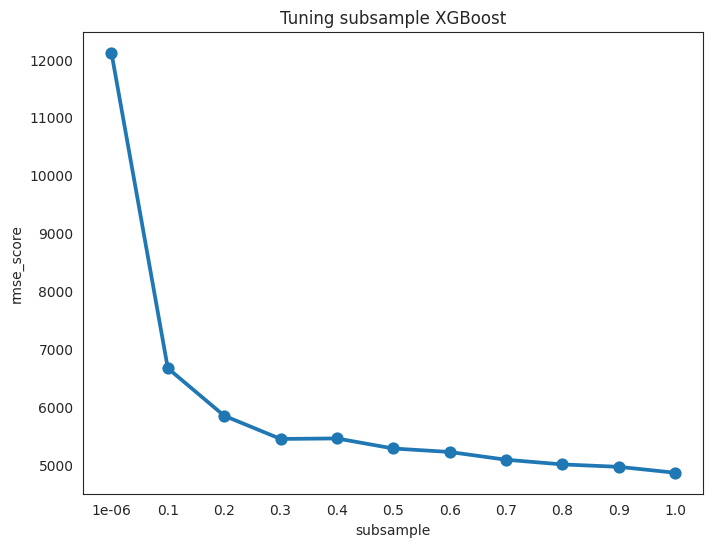

In [ ]:
subsample = []
rmse_score = []

for sub in [0.000001,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.title('Tuning subsample XGBoost')
plt.show()

**7.d. Subsamples**

In [ ]:
n_estimators = 100
subsample = 0.4

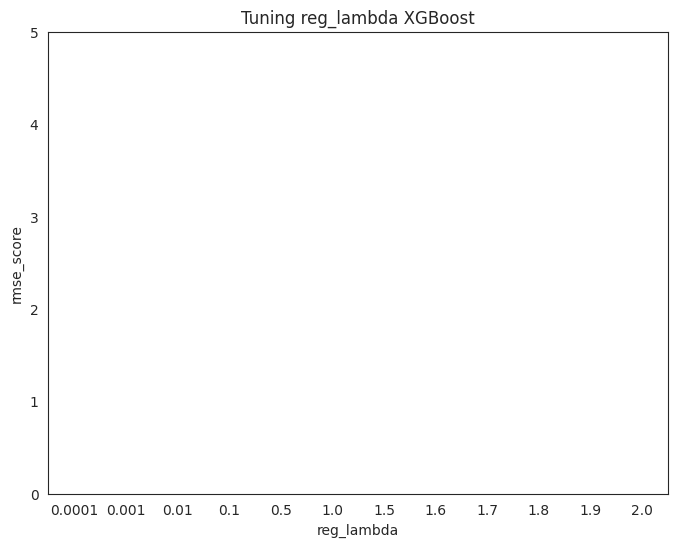

In [ ]:
reg_lambda = []
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)


#create dataset eta
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='rmse_score')
plt.title('Tuning reg_lambda XGBoost')
plt.ylim(0,5)
plt.show()

In [ ]:
n_estimators = 100
subsample = 0.4


7.2 **Non-Tuning hyperparameter**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train,y_train)


predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9974430414041185
r2 score test 0.8387483266073801
MAE train 379.29576257735295
MAE test 2712.6547439280553
MSE train 374513.6172705827
MSE test 23643415.00796257
RMSE train 611.9751770052301
RMSE test 4862.449486417579


7.2.a **Fixed/Initialized hyperparameter**

In [ ]:
# Put all together
xgb = XGBRegressor(
                  n_estimators = 100,
                  subsample = 0.4,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9916803497525044
r2 score test 0.797085739681531
MAE train 793.9377191631506
MAE test 3462.284186204923
MSE train 1218565.8045595372
MSE test 29752162.98104407
RMSE train 1103.886681031861
RMSE test 5454.554333861206


8. **Hyperparameter Investigation**

8.1 **Scan Candidate hyperparameters**

1.   Scan candidate hyparameters
2.   Obtain the most important feature
3.   Combine most important feature with best hyperpamameters



In [ ]:
def objective(trial):
    # Definisi ruang pencarian hyperparameter
    param = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
    }

    # Membuat dan melatih model XGBoost
    model = XGBRegressor(**param,random_state=42)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

    # Melakukan prediksi dan menghitung MAPE
    preds = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, preds)

    return mape

study = optuna.create_study(direction='minimize')  # Menggunakan 'minimize' karena kita ingin mengurangi MAPE
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

[I 2024-03-08 05:19:52,020] A new study created in memory with name: no-name-94647ba0-be96-4d7d-8cbb-3d03891b6c9a
<ipython-input-37-d456282fe769>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
<ipython-input-37-d456282fe769>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 202

Best trial: {'learning_rate': 0.0776716015707843, 'max_depth': 10, 'n_estimators': 961, 'subsample': 0.5136674865847505, 'reg_lambda': 7.931743875816763}


In [ ]:
print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

Best hyperparameters: {'learning_rate': 0.0776716015707843, 'max_depth': 10, 'n_estimators': 961, 'subsample': 0.5136674865847505, 'reg_lambda': 7.931743875816763}
Best value: 0.2583439742219851


In [ ]:
import optuna.visualization as vis

vis.plot_param_importances(study)

In [ ]:
#extract best parameters from optuna
best_params = study.best_trial.params
best_params

{'learning_rate': 0.0776716015707843,
 'max_depth': 10,
 'n_estimators': 961,
 'subsample': 0.5136674865847505,
 'reg_lambda': 7.931743875816763}

8.2 **Re-Train the Model with new hyperparameters**

In [ ]:
# Put all together
xgb = XGBRegressor(**best_params,
                  random_state=42)

xgb.fit(X_train,y_train)

predict_train = xgb.predict(X_train)
predict_test = xgb.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9999274045413015
r2 score test 0.8363937792608356
MAE train 43.16422015850362
MAE test 2832.8772091381343
MSE train 10632.940196375283
MSE test 23988648.883053605
RMSE train 103.1161490571447
RMSE test 4897.820830027738


In [ ]:
# Optuna with Cross Validation

from sklearn.model_selection import RepeatedKFold


def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
    }

    mape_scores = []
    rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    for train_index, test_index in rkf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Membuat dan melatih model XGBoost
        model = XGBRegressor(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

        # Melakukan prediksi dan menghitung MAPE
        preds = model.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, preds)
        mape_scores.append(mape)

    return np.mean(mape_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

Streaming output truncated to the last 5000 lines.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sk

Best trial: {'learning_rate': 0.04289383441755308, 'max_depth': 3, 'n_estimators': 871, 'subsample': 0.6255109114972881, 'reg_lambda': 7.870640872068414}


In [ ]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression',
                       num_leaves=6,
                       learning_rate=0.01,
                       n_estimators=7000,
                       max_bin=200,
                       bagging_fraction=0.8,
                       bagging_freq=4,
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

In [ ]:
lightgbm.fit(X_train,y_train)

predict_train = lightgbm.predict(X_train)
predict_test = lightgbm.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.7848393837565989
r2 score test 0.7605680176645279
MAE train 4077.6186784145066
MAE test 4322.8211170777
MSE train 31514229.76237371
MSE test 35106548.69765723
RMSE train 5613.753625015414
RMSE test 5925.077948656644


In [ ]:
# Stacking Model
from sklearn.ensemble import StackingRegressor

# Definisi base models
base_models = [
    ('xgb', xgb),
    ('rf', RandomForestRegressor(random_state=42,max_depth=3))
]

# Definisi meta-model
meta_model = LinearRegression()

# Membuat stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model,cv=5)

# Melatih model stacking
stacking_regressor.fit(X_train, y_train)

# Mengevaluasi model
predict_train = stacking_regressor.predict(X_train)
predict_test = stacking_regressor.predict(X_test)

r2_score_train = r2_score(y_train,predict_train)
r2_score_test = r2_score(y_test,predict_test)

mae_score_train = mean_absolute_error(y_train,predict_train)
mae_score_test = mean_absolute_error(y_test,predict_test)

mse_score_train = mean_squared_error(y_train,predict_train)
mse_score_test = mean_squared_error(y_test,predict_test)

rmse_score_train = np.sqrt(mse_score_train)
rmse_score_test = np.sqrt(mse_score_test)

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)
print('MAE train',mae_score_train)
print('MAE test',mae_score_test)
print('MSE train',mse_score_train)
print('MSE test',mse_score_test)
print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9050946334693105
r2 score test 0.8629129603444371
MAE train 2212.2038200526576
MAE test 2682.166987637551
MSE train 13900636.551193967
MSE test 20100292.31075153
RMSE train 3728.3557436481256
RMSE test 4483.334954110783


In [ ]:
r2_score_train_1 = 0.9974430414041185
r2_score_test_1 = 0.8387483266073801
r2_score_train_2 =  0.9916803497525044
r2_score_test_2 =  0.797085739681531
r2_score_train_3 = 0.9999274045413015
r2_score_test_3 = 0.8363937792608356
r2_score_train_4 = 0.7848393837565989
r2_score_test_4 =0.7605680176645279
r2_score_train_5 =  0.9050946334693105
r2_score_test_5 = 0.8629129603444371

RMSE_train_1 = 611.9751770052301
RMSE_test_1 = 4862.449486417579
RMSE_train_2 = 1103.886681031861
RMSE_test_2 = 5454.554333861206
RMSE_train_3 = 103.1161490571447
RMSE_test_3 = 4897.820830027738
RMSE_train_4 = 3728.3557436481256
RMSE_test_4 = 4483.334954110783
RMSE_train_5 = 5613.753625015414
RMSE_4test_5 = 5925.077948656644


data = {
    'Model': ['Non-Tuning XGB', 'Fixed parameter XGB', 'Best-param XGB', 'LGB', 'Stacking'],
    'R2_train': [0.9974430414041185, 0.9916803497525044, 0.9999274045413015, 0.7848393837565989, 0.9050946334693105],
    'R2_test': [0.8387483266073801, 0.797085739681531, 0.8363937792608356, 0.7605680176645279, 0.8629129603444371],
    'RMSE_train': [611.9751770052301, 1103.886681031861, 103.1161490571447, 3728.3557436481256, 5613.753625015414],
    'RMSE_test': [4862.449486417579, 5454.554333861206, 4897.820830027738, 4483.334954110783, 5925.077948656644],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

                 Model  R2_train   R2_test   RMSE_train    RMSE_test
0       Non-Tuning XGB  0.997443  0.838748   611.975177  4862.449486
1  Fixed parameter XGB  0.991680  0.797086  1103.886681  5454.554334
2       Best-param XGB  0.999927  0.836394   103.116149  4897.820830
3                  LGB  0.784839  0.760568  3728.355744  4483.334954
4             Stacking  0.905095  0.862913  5613.753625  5925.077949


***Findings:***

1.   Based on the gap of result between RMSE training and testing; all of the XGB model are overfit. The discrepency between training and test scores are more than 10%.
2.   LGB Regresson and Stacking model results are the two model that are good fit.

